# Microphones

[return to main page](index.ipynb)

## Preparations

In [1]:
import numpy as np
import sounddevice as sd  # for playback
import soundfile as sf  # for reading a soundfile

# remove "inline" to get a separate plotting window:
%matplotlib inline  
import matplotlib.pyplot as plt

## Basic Microphone Types

### Pressure Microphone

A pressure microphone measures the sound pressure $P(\mathbf x, \omega)$ where $\mathbf x$ is the position of the microphone. The microphone signal is hence given as

$$
M(\mathbf x, \omega) = P(\mathbf x, \omega)
$$

### Pressure-Gradient Microphone

This type of microphone measures the gradient of the sound pressure along a specific direction, which is define by the orientation of the membrane inside the microphone. The so-called directional gradient along the direction defined by the surface normal $\mathbf n_m$ onto the membrane is given as

$$ M(\mathbf x, \omega) = \frac{\partial}{\partial \mathbf n_m} P(\mathbf x, \omega)
    = \mathbf n_m \cdot \nabla P(\mathbf x, \omega)
$$

*Exercise*: Calculate the pressure gradient of a point source with its sound pressure given as 

$$P_{ps}(\mathbf x | \mathbf x_s, \omega) = \frac{\mathrm{exp}\left(-j\frac{\omega}{c} |\mathbf x-\mathbf x_{\mathrm s}| \right)}{4\pi|\mathbf x-\mathbf x_{\mathrm s}|} $$

<font color='blue'>
*
For the gradient, we need the derivative with respect to each component of $\mathbf x$. Using the chain rule of differentiation, we can write for $x$:

$$
  \frac{\partial}{\partial x} P(\mathbf x | \mathbf x_s, \omega) = 
      \frac{\partial}{\partial x}
      \frac{\mathrm{exp}\left(-j\frac{\omega}{c} |\mathbf x-\mathbf x_{\mathrm s}| \right)}{4\pi|\mathbf x-\mathbf x_{\mathrm s}|} =     
  \left(\frac{\partial (|\mathbf x - \mathbf x_s|)}{\partial x}\right) \cdot
  \left(\frac{\partial }{\partial (|\mathbf x -\mathbf  x_s|)} 
  \frac{\mathrm{exp}\left(-j\frac{\omega}{c} |\mathbf x-\mathbf x_{\mathrm s}| \right)}{4\pi|\mathbf x-\mathbf x_{\mathrm s}|}
  \right)
$$

The first derivative yields:
$$ 
    \left(\frac{\partial (|\mathbf x - \mathbf x_s|}{\partial x}\right) = 
    \left(\frac{\partial (\sqrt{(x-x_s)^2 + (y-y_s)^2 + (z-z_s)^2}}{\partial x}\right) =
    \frac{x-x_s}{\sqrt{(x-x_s)^2 + (y-y_s)^2 + (z-z_s)^2}} =
    \frac{x-x_s}{|\mathbf x - \mathbf x_s|}
$$

The second derivative with $u = |\mathbf x - \mathbf x_s|$ yields:

$$ 
  \frac{\partial }{\partial u} 
  \frac{\mathrm{exp}\left(-j\frac{\omega}{c} u \right)}{4\pi u} =
  \left(-j\frac{\omega}{c} - \frac{1}{u} \right) \frac{\mathrm{exp}\left(-j\frac{\omega}{c} u \right)}{4\pi u}
$$

Repeating the procedure for $y$ and $z$ and evaulating the scalar product with $\mathbf n_m$ results in

$$
\frac{\partial}{\partial \mathbf n_m} P_{ps}(\mathbf x | \mathbf x_s, \omega) =
    \left(j\frac{\omega}{c} + \frac{1}{|\mathbf x- \mathbf x_s|} \right) 
    \frac{(\mathbf x_s - \mathbf x) \cdot \mathbf n_m}{|\mathbf x- \mathbf x_s|} 
    \frac{\mathrm{exp}\left(-j\frac{\omega}{c} |\mathbf x_{\mathrm s} - \mathbf x| \right)}{4\pi|\mathbf x-\mathbf x_{\mathrm s}|}
$$
*
</font>

*Exercise*: Can to tell anything about the behaviour of the microphone for low/high temporal frequencies and close/far distances between the microphone and the point source?

<font color='blue'>
*
For 
*
</font>

### Combining Pressure and Pressure-Gradient Microphones

There is also the possibility to combine both prior types to

$$
M(\mathbf x, \omega) = a(\omega)\,P(\mathbf x, \omega) + b(\omega)\,\frac{\partial}{\partial \mathbf n_m} P(\mathbf x, \omega)
$$

## Technical Parameters

### The Far-Field Directivity

#### Definition

For the far-field directivity the microphone signal caused by a point source is normalised by the sound pressure of that point source. 

$$
M_0(\phi_s, \theta_s, \omega) = \lim_{|\mathbf x_s|\rightarrow \infty} \frac{M_{ps}(\mathbf x| \mathbf x_s, \omega)}{P_{ps}(\mathbf x | \mathbf x_s, \omega)}
$$

where the point source is assumed to be at an infinite distance. The far-field directivity is hence depending on the direction of arrival defined by the two the angles $\phi_s$ and $\theta_s$ in spherical coordinates. In general, the directivity is frequency-dependent. In most cases, the directivity of the microphone is rotationally symmetric with respect to the microphone orientation $\mathbf n_m $ so that M_0 depends only of the angle between $\mathbf n_m$ and $\mathbf x_s$ called $\Theta$.

*Exercise*: Calculate the Far-Field-Directivity of Pressure Microphone.

<font color='blue'>

$$
M_0(\Theta) = 1
$$

</font>

*Exercise*: Calculate the Far-Field-Directivity of Pressure-Gradient Microphone.

<font color='blue'>

$$
 M_0(\Theta) = 
    \lim_{|\mathbf x_s|\rightarrow \infty} 
    \left(j\frac{\omega}{c} + \frac{1}{|\mathbf x - \mathbf x_s|} \right) 
    \frac{(\mathbf x_s - \mathbf x) \cdot \mathbf n_m}{|\mathbf x- \mathbf x_s|} = 
    j\frac{\omega}{c} \frac{\mathbf x_s}{|\mathbf x_s|} \cdot \mathbf n_m =
    j\frac{\omega}{c} \cos( \Theta )
$$
</font>

It is common practice, to compensate the frequency dependence of the far-field directivity of pressure gradient microphones, so that the frequency dependent term (high-pass characteristic) vanishes. 

#### First-Order Directivity Patterns

First-order directivities subsume patterns with

$$
  M_0(\phi_s, \theta_s) = M_0(\Theta) = a + (1-a) \cos( \Theta )
$$

They hence linearly combine the directivity patterns of a pressure and a pressure-gradient microphone. Let's plot some directivity patterns:

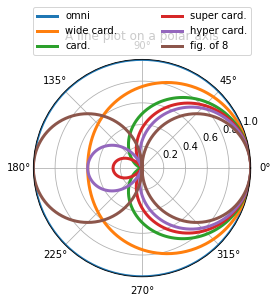

In [2]:
# a = ...
# 1 - omnidirectional
# 0.75 - wide cardioid
# 0.5 - cardioid
# 0.366 - super cardioid
# 0.25 - hyper cardioid
# 0 - figure of eight
a = np.array([1, 0.75, 0.5, 0.3666, 0.25, 0]).reshape(-1,1);

theta = np.linspace(0,2*np.pi, 361)
theta = theta.reshape(1,-1)
theta = np.array([1, -1, 1, -1, 1, -1]).reshape(-1,1) * theta

A = np.abs(a + (1 - a)*np.cos(theta))

# plotting
ax = plt.subplot(111, projection='polar')
plt.plot(theta.T, A.T, linewidth=3)
ax.set_rmax(1.0)
ax.grid(True)
ax.legend(['omni', 'wide card.', 'card.', 'super card.', 'hyper card.', 'fig. of 8'], 
    bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

*Exercise*: Compare the directivity patterns! Can you observe any relation between the width of the front lobe (around 0$^\circ$) and width of the back lobe (around 180$^\circ$) ? 

*Exercise*: Compare the effect of different patterns with regard to the supression of noise coming from a different direction than the target sound.

In [3]:
# target and masker
[x_target, fs] = sf.read('data/xmas.wav')  # target sound
x_noise = 0.25*np.random.randn(len(x_target))  # gaussian noise as masker
# play around with the directions!
theta_target = 0  # in degree
theta_noise = 90  # in degree
# interate over all patterns
for aa in a:
    A_target = np.abs(aa + (1-aa)*np.cos(theta_target*np.pi/180))
    A_noise = np.abs(aa + (1-aa)*np.cos(theta_noise*np.pi/180))
    x_mix = A_target*x_target + A_noise*x_noise
    sd.play(x_mix, fs, blocking=True)

#### Short Demo

One Loudspeaker is placed in front of a microphone, another loudspeaker is placed somewhere else. The first loudspeaker emits speech, while the second emits noise. We will compare the recorded signals for two different microphone capsules: one omnidirectional, one hyper-cardiod.

In [4]:
[x_target, fs] = sf.read('data/xmas.wav')  # target sound
x_noise = np.random.randn(len(x_target))  # gaussian noise as masker
x_mix = np.column_stack((0.2*x_target,0.1*x_noise))  # two-channel signal

# play and record simultaneously (change microphones in between)
x_rec_omni = sd.playrec(x_mix, samplerate=fs, channels=1, output_mapping=[1,2], blocking=True)
# x_rec_card = sd.playrec(x_mix, samplerate=fs, channels=1, output_mapping=[1,2], blocking=True)

Let's listen to the recorded signals!

In [5]:
x_rec_omni = x_rec_omni/np.max(np.abs(x_rec_omni))
# x_rec_card = x_rec_card/np.max(np.abs(x_rec_card))

sd.play(0.05*x_rec_omni, samplerate=fs, blocking=True)
# sd.play(0.05*x_rec_card, samplerate=fs, blocking=True)

### The Directivity Factor

The directivity factor describes the ratio between the squared directivity for the frontal direction, i.e. $\Theta = 0$, and the mean squared directivity. For the rotationally symmetric directivity this reads

$$
  \gamma(\omega) = \frac{M_0^2(0^\circ)}{\frac{1}{2}\int_0^\pi M_0^2(\Theta)\, \sin(\Theta) \, \mathrm d \Theta}
$$

*Exercise*: Calculate the directivity-index for a general first-order directivity pattern $M_0(\Theta) = a + (1-a) \cos( \Theta)$.

<font color='blue'>
*
For the directivity-index, we need the integral in the denominator
$$
\int_0^\pi (a+(a-1)\cos(\Theta))^2 \sin(\theta)\, \mathrm d \Theta =
\int_0^\pi \left( a^2 + 2a(a-1)\cos(\Theta) + (a-1)^2\cos^2(\Theta)\right) \sin(\Theta) \, \mathrm d \Theta
$$

Substitute $u = \cos(\Theta)$ which yields $\mathrm du = - \mathrm \sin(\Theta) \mathrm d \Theta$. This results in the equivalent integral

$$
\int_{-1}^{1} \left( a^2 + 2a(a-1)u + (a-1)^2 u^2\right) \, \mathrm d u = 2\left[a^2 + \frac{1}{3}(a-1)^2 \right]
$$

The final directivity-factor reads

$$
  \gamma(a, \omega) = \frac{1}{a^2 + \frac{1}{3}(a-1)^2}
$$
*
</font>

Exercise: For which $a$ does $\gamma(a, \omega)$ reach a maximum? To which directivity pattern does the value correspond?

<font color='blue'>
*
A local extremum is possibly reached if the first derivative is zero .
$$
  \frac{\partial}{\partial a} \gamma(a, \omega) = \frac{2a+\frac{2}{3}(a-1)}{(a^2 + \frac{1}{3}(a-1)^2)^2} = 0
$$
Multiplying both side with the denominator yields
$$ 
  2a+\frac{2}{3}(a-1) = 0 \Rightarrow a = \frac{1}{4}
$$
This value corresponds to a hyper-cardiod pattern
*
</font>

## Solutions

If you had problems solving some of the exercises, don't despair!
Have a look at the [example solutions](microphones-solutions.ipynb).

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>